# Определение преспективного тарифа для телеком-компании / Determination of a prospective tariff for a telecom company

В данном проекте у нас есть данные 500 пользователей телеком-оператора "Мегалайн" (звонки, смс, интернет). Наша цель состоит в том, чтобы используя эти данные, понять какой тариф лучше: Смарт или Ультра. Это поможет спланировать рекламный бюджет.

Сперва изучим данные, затем подготовим их для анализа, проведем исследовательский анализ данных, и применим статистический тест для проверки интересующих нас гипотез.

----

In this project, we have data of 500 users of the Megaline telecom operator (calls, SMS, Internet). Our goal is to use this data to understand which tariff is better: Smart or Ultra. This will help you plan your advertising budget.

We first examine the data, then prepare it for analysis, perform an exploratory analysis of the data, and apply a statistical test to test the hypotheses that interest us.

## Загрузка данных / Data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import random as rd

Считаем данные. При считывании сразу переведем колонки с датами в тип ***datetime*** с помощью параметра **parse_dates**.

----

Import the data. When importing, we immediately convert the columns with dates to the ***datetime*** type using the **parse_dates** parameter.

In [4]:
try:
    calls = pd.read_csv('/datasets/calls.csv', parse_dates=['call_date'])
    internet = pd.read_csv('/datasets/internet.csv', parse_dates=['session_date'])
    messages = pd.read_csv('/datasets/messages.csv', parse_dates=['message_date'])
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv', parse_dates=['reg_date'], index_col=['user_id'])
except:
    calls = pd.read_csv('/Users/vlad/Documents/Documents Linux/Yandex DS/Projects/YandexPracticum-projects/stat/calls.csv', parse_dates=['call_date'])
    internet = pd.read_csv('/Users/vlad/Documents/Documents Linux/Yandex DS/Projects/YandexPracticum-projects/stat/internet.csv', parse_dates=['session_date'])
    messages = pd.read_csv('/Users/vlad/Documents/Documents Linux/Yandex DS/Projects/YandexPracticum-projects/stat/messages.csv', parse_dates=['message_date'])
    tariffs = pd.read_csv('/Users/vlad/Documents/Documents Linux/Yandex DS/Projects/YandexPracticum-projects/stat/tariffs.csv')
    users = pd.read_csv('/Users/vlad/Documents/Documents Linux/Yandex DS/Projects/YandexPracticum-projects/stat/users.csv', parse_dates=['reg_date'], index_col=['user_id'])

In [5]:
# изучим основную информацию по датасетам через цикл
# explore the data in a loop
dfs = [calls, internet, messages, tariffs, users]
for df in dfs:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2),

In [6]:
# выведем на экран сами датасеты для изучения
# show first rows in each dataset
for df in dfs:
    display(df)
    print()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,age,churn_date,city,first_name,last_name,reg_date,tariff
user_id,,,,,,,
1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...
1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart


In [7]:
# удалим ненужную колонку с id в датасете internet
# delete extra column in internet dataset
internet.drop('Unnamed: 0', axis=1, inplace=True)
internet

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [8]:
# выведем описательную статистику по датасетам через цикл
# show descriptive statistics in a loop
for df in dfs:
    display(df.describe())

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


### Вывод / Conclusion

Данные содержат переменные разных типов (даты, строки, числа). Все колонки, содержащие даты, перевели в соответствующий формат при считывании данных. Колонку, содержащую длительность звонков в датасете **calls** неоходимо округлить до целых минут (в соответствии с правилами оператора) для каждого наблюдения и перевести в тип ***int***.

Описательная статистика не выявила аномалий в данных.

Пропуски есть только в в колонке **churn_date** датасета **users**. Они обозначают, что тариф действовал на момент выгрузки данных. Можно заменить их значениями-заглушками или не трогать вообще.

----

The data contains variables of different types (dates, strings, numbers). All columns containing dates were converted to the appropriate format when reading the data. The column containing the duration of calls in the **calls** dataset must be rounded up to whole minutes (according to the operator's rules) for each observation and converted to the ***int*** type.

Descriptive statistics revealed no anomalies in the data.

There are gaps only in the **churn_date** column of the **users** dataset. They indicate that the tariff was valid at the time of uploading the data. You can replace them with stub values or leave them alone.

## Подготовка данных / Data preprocessing

### Изменение типа переменных / Data type conversion

Необходимо округлить минуты звонков в соответствии с правилами оператора и перевести их в тип ***int***.

It is necessary to round minutes of calls in accordance with the rules of the operator and convert them to the ***int*** type.

In [9]:
# округлим продолжительность звонков до целых и переведем в int
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Расчет помесячных показателей на пользователя / Calculate monthly values per user

Посчитаем количество звонков и их продолжительность, количесвто смс, и количество интернет траффика для каждого пользователя помесячно.

----

Let's calculate the number of calls and their duration, the number of SMS, and the amount of Internet traffic for each user on a monthly basis.

In [10]:
# количество звонков в месяц на пользователя
# amount of calls in a month per user
calls['month'] = calls['call_date'].dt.month
calls_month = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['count', 'sum']).reset_index()
calls_month.columns = ['user_id', 'month', 'n_calls', 'calls_duration']
calls_month

,user_id,month,n_calls,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [11]:
messages['month'] = messages['message_date'].dt.month
messages_month = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_month.columns = ['user_id', 'month', 'n_messages']
messages_month

,user_id,month,n_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [12]:
internet['month'] = internet['session_date'].dt.month
internet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_month

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Объединим сводные таблицы в одну и добавим тариф пользователя. В итоге, таблица должна иметь id пользователя, месяц пользования, количество звонков в месяце, продолжительность звонков в месяце, количество сообщений в месяце, количество интернет-траффика в месяце, и тариф пользователя.

----

Let's combine the pivot tables into one and add the user's tariff. As a result, the table should have the user id, the month of use, the number of calls per month, the duration of calls per month, the number of messages per month, the amount of Internet traffic per month, and the user's tariff.

In [13]:
internet_month

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


In [14]:
users_activity_month = (internet_month.merge(calls_month, on=['user_id', 'month'], how='left').
 merge(messages_month, on=['user_id', 'month'], how='left').
 merge(users['tariff'], on='user_id')
)

In [15]:
users_activity_month

,user_id,month,mb_used,n_calls,calls_duration,n_messages,tariff
0,1000,5,2253.49,22.0,159.0,22.0,ultra
1,1000,6,23233.77,43.0,172.0,60.0,ultra
2,1000,7,14003.64,47.0,340.0,75.0,ultra
3,1000,8,14055.93,52.0,408.0,81.0,ultra
4,1000,9,14568.91,58.0,466.0,57.0,ultra
...,...,...,...,...,...,...,...
3198,1498,10,20579.36,41.0,247.0,42.0,smart
3199,1499,9,1845.75,9.0,70.0,11.0,smart
3200,1499,10,17788.51,68.0,449.0,48.0,smart
3201,1499,11,17963.31,74.0,612.0,59.0,smart


In [16]:
# проверим пропуски / check missing values
users_activity_month.isna().sum()

user_id             0
month               0
mb_used             0
n_calls            40
calls_duration     40
n_messages        497
tariff              0
dtype: int64

Некоторые пользователи не использовали интернет, не звонили и не отправляли сообщения в какие-то из месяцев. Заменим эти пропуски на 0.

----

Some users did not use the Internet, did not call or send messages in any of the months. Let's replace these gaps with 0.

In [17]:
users_activity_month.fillna(0, inplace=True)

Посчитаем помесячную выручку на пользователя.

Calculate monthly profit per user.

In [18]:
def month_revenue(row):
    if row['tariff'] == 'smart':
        min_left_smart = row['calls_duration'] - int(tariffs.query('tariff_name == "smart"')['minutes_included'])
        messages_left_smart = row['n_messages'] - int(tariffs.query('tariff_name == "smart"')['messages_included'])
        internet_left_smart = row['mb_used'] - int(tariffs.query('tariff_name == "smart"')['mb_per_month_included'])
        
        if min_left_smart < 0:
            min_left_smart = 0
        if messages_left_smart < 0:
            messages_left_smart = 0
        if internet_left_smart < 0:
            internet_left_smart = 0
        
        return ((min_left_smart * int(tariffs.query('tariff_name == "smart"')['rub_per_minute'])) +
                 (messages_left_smart * int(tariffs.query('tariff_name == "smart"')['rub_per_message'])) +
                 ((np.ceil(internet_left_smart / 1024)) * int(tariffs.query('tariff_name == "smart"')['rub_per_gb'])) +
                 (int(tariffs.query('tariff_name == "smart"')['rub_monthly_fee']))
               )
        
    else:
        min_left_ultra = row['calls_duration'] - int(tariffs.query('tariff_name == "ultra"')['minutes_included'])
        messages_left_ultra = row['n_messages'] - int(tariffs.query('tariff_name == "ultra"')['messages_included'])
        internet_left_ultra = row['mb_used'] - int(tariffs.query('tariff_name == "ultra"')['mb_per_month_included'])
        
        if min_left_ultra < 0:
            min_left_ultra = 0
        if messages_left_ultra < 0:
            messages_left_ultra = 0
        if internet_left_ultra < 0:
            internet_left_ultra = 0
        
        return ((min_left_ultra * int(tariffs.query('tariff_name == "ultra"')['rub_per_minute'])) +
                 (messages_left_ultra * int(tariffs.query('tariff_name == "ultra"')['rub_per_message'])) +
                 ((np.ceil(internet_left_ultra / 1024)) * int(tariffs.query('tariff_name == "ultra"')['rub_per_gb'])) +
                 (int(tariffs.query('tariff_name == "ultra"')['rub_monthly_fee']))
               )        

In [19]:
users_activity_month['revenue'] = users_activity_month.apply(month_revenue, axis=1)
users_activity_month

,user_id,month,mb_used,n_calls,calls_duration,n_messages,tariff,revenue
0,1000,5,2253.49,22.0,159.0,22.0,ultra,1950.0
1,1000,6,23233.77,43.0,172.0,60.0,ultra,1950.0
2,1000,7,14003.64,47.0,340.0,75.0,ultra,1950.0
3,1000,8,14055.93,52.0,408.0,81.0,ultra,1950.0
4,1000,9,14568.91,58.0,466.0,57.0,ultra,1950.0
...,...,...,...,...,...,...,...,...
3198,1498,10,20579.36,41.0,247.0,42.0,smart,1750.0
3199,1499,9,1845.75,9.0,70.0,11.0,smart,550.0
3200,1499,10,17788.51,68.0,449.0,48.0,smart,1150.0
3201,1499,11,17963.31,74.0,612.0,59.0,smart,1513.0


## Исследование данных / EDA

Рассчитаем среднее, дисперсию, и стандартное отклонение для времени звонков, количества смс, использованного интернета помесячной выручки в зависимости от тарифного плана.

----

Let's calculate the mean, variance, and standard deviation for the call time, the number of SMS, the monthly revenue used by the Internet, depending on the tariff plan.

In [20]:
users_statistics = round(users_activity_month.pivot_table(index='tariff',
                                                   values=['calls_duration', 'n_messages',
                                                          'mb_used', 'revenue'],
                                                   aggfunc=['mean', 'var', 'std']
                        ),2)
users_statistics

mean                                          var  \
       calls_duration   mb_used n_messages  revenue calls_duration   
tariff                                                               
smart          418.10  16215.66      33.40  1290.31       36174.76   
ultra          529.75  19668.49      49.59  2071.38      100883.82   

                                                     std                      \
            mb_used n_messages    revenue calls_duration  mb_used n_messages   
tariff                                                                         
smart   34359951.68     796.70  669840.48         190.20  5861.74      28.23   
ultra   98864248.95    2301.92  142819.95         317.62  9943.05      47.98   

                
       revenue  
tariff          
smart   818.44  
ultra   377.92

Построим гистограммы для времени звонков, количества смс и использованного интернета в зависимости от тарифного плана.

----

Let's build histograms for the time of calls, the number of SMS and the Internet used, depending on the tariff plan.

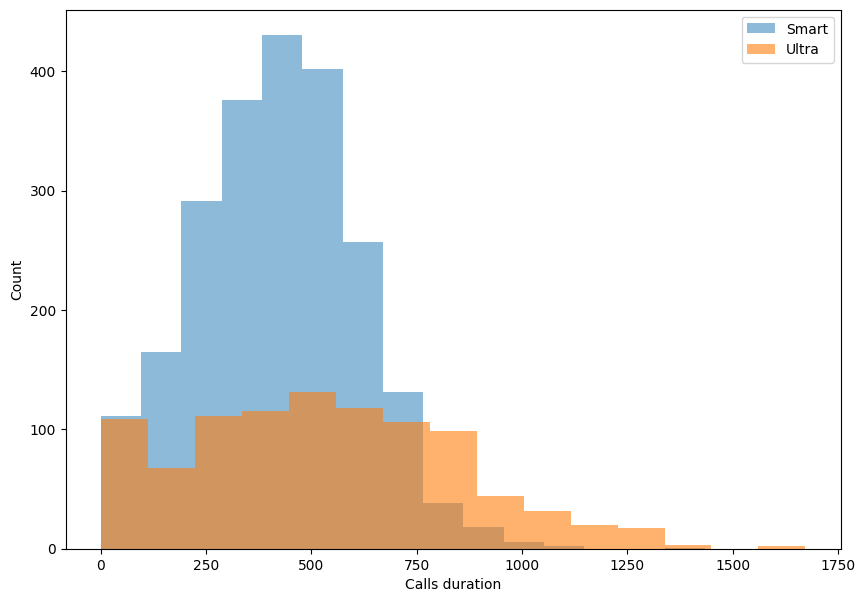

In [21]:
# гистограммы продолжительности звонков
# calls duration hist

# перенесем данные для разных тарифов в разные датафрэймы
smart = users_activity_month.query('tariff == "smart"')
ultra = users_activity_month.query('tariff == "ultra"')

# отобразим гистограммы на одном графике
plt.figure(figsize=(10,7))
plt.hist(smart['calls_duration'], bins=15, alpha=0.5, label='Smart')
plt.hist(ultra['calls_duration'], bins=15, alpha=0.6, label='Ultra')
plt.legend(loc='upper right')
plt.xlabel('Calls duration')
plt.ylabel('Count')
plt.show()

Гистограммы времени разговоров для двух тарифов имеют нормальное распределение. Однако, переменная времени разговоров (непрерывная величина) для тарифа **smart** имеет среднее 394.42 и стандартное отклонение 179.78, а для тарифа **ultra** эти величины составляют 498.77.65 и 299.70 соответственно. Поэтому, гистограмма распределения для одного тарифа узкая, а для другого широкая (больший разброс данных). Делаем вывод, что людям, подключенным к тарифу **smart** требуется в среднем около 400 мин разговоров, для людей, подключенным к тарифу **ultra** - чуть меньше 500 минут.

---

Talk time histograms for two tariffs have a normal distribution. However, the talk time variable (continuous value) for the **smart** tariff has a mean of 394.42 and a standard deviation of 179.78, while for the **ultra** tariff these values are 498.77.65 and 299.70 respectively. Therefore, the distribution histogram for one tariff is narrow, and for another it is wide (greater data spread). We conclude that people connected to the **smart** tariff need an average of about 400 minutes of calls, for people connected to the **ultra** tariff - a little less than 500 minutes.

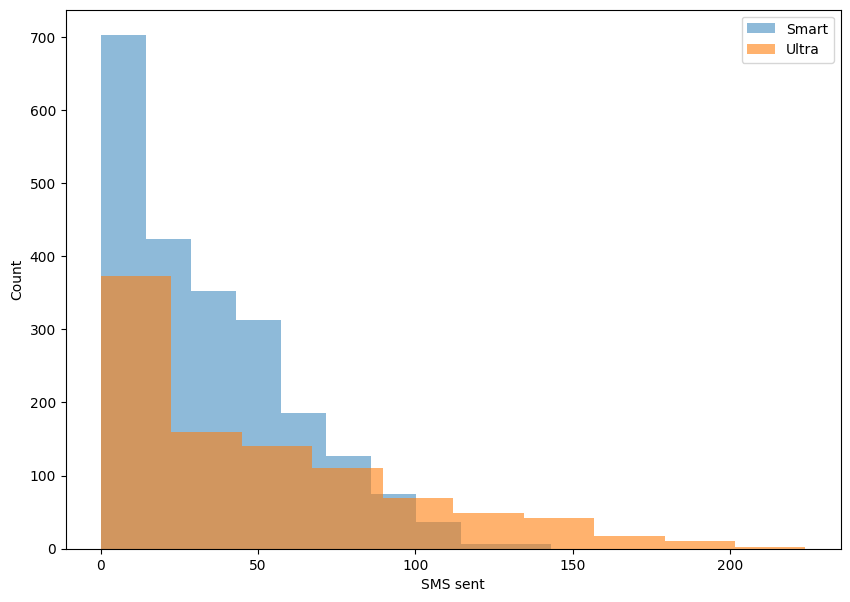

In [22]:
# гистограммы количества смс
# sms amount hist

# отобразим гистограммы на одном графике
plt.figure(figsize=(10,7))
plt.hist(smart['n_messages'], alpha=0.5, label='Smart')
plt.hist(ultra['n_messages'], alpha=0.6, label='Ultra')
plt.legend(loc='upper right')
plt.xlabel('SMS sent')
plt.ylabel('Count')
plt.show()

Гистограммы для количества отправленных смс имеют Пуассоновское распределение. Это объясняется тем, что количество смс - это дискретная величина. К тому же, события происходят за фиксированное количество времени (количество смс в месяц). Среднее и стандартное отклонение для этой величины 33.40 и 28.23 соответственно для тарифа **smart**, 49.59 и 47.98 соответственно для тарифа **ultra**. В среднем людям, подключенным к тарифу **smart** требуется 33 смс в месяц против 50 смс для людей в тарифе **ultra**.

----

Histograms for the number of sent SMS have a Poisson distribution. This is because the number of SMS is a discrete value. In addition, events occur for a fixed amount of time (the number of SMS per month). The mean and standard deviation for this value are 33.40 and 28.23 respectively for the **smart** tariff, 49.59 and 47.98 respectively for the **ultra** tariff. On average, people connected to the **smart** plan need 33 sms per month versus 50 sms for people on the **ultra** plan.

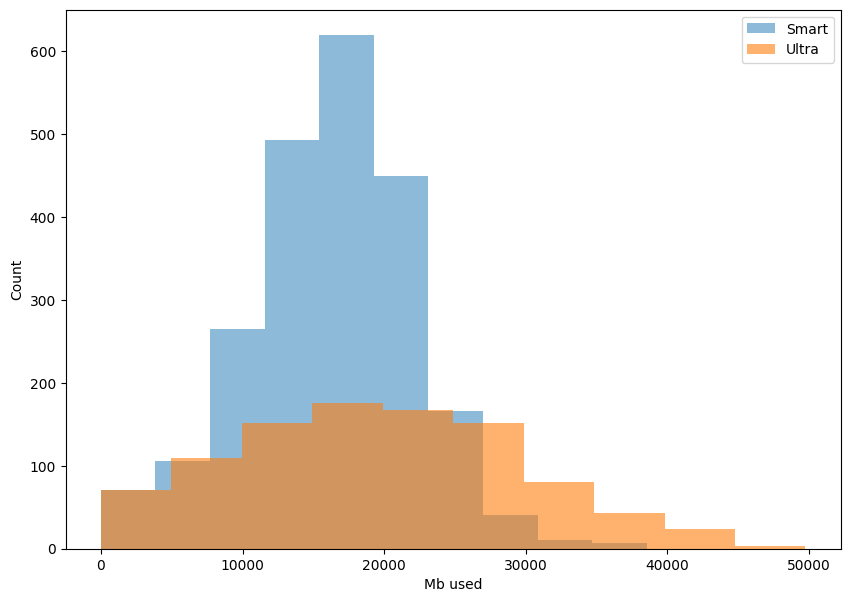

In [23]:
# гистограммы использованного интернета
# internet usage hist

# отобразим гистограммы на одном графике
plt.figure(figsize=(10,7))
plt.hist(smart['mb_used'], alpha=0.5, label='Smart')
plt.hist(ultra['mb_used'], alpha=0.6, label='Ultra')
plt.legend(loc='upper right')
plt.xlabel('Mb used')
plt.ylabel('Count')
plt.show()

Гистограммы использованных мегабайт имеют нормальное распределение со средними 16215.66	(**smart**) и 19668.49 (**ultra**), и со стандартными отклонениями 5861.74 (**smart**) и 9943.05 (**ultra**). Пользователи тарифа **ultra** в среднем используют больше интрнета, чем пользователи тарифа **smart**.

----

The histograms of used megabytes are normally distributed with means 16215.66 (**smart**) and 19668.49 (**ultra**), and with standard deviations 5861.74 (**smart**) and 9943.05 (**ultra**). **ultra** plan users use more internet on average than **smart** plan members.

По данным, полученным выше, мы можем сделать вывод, что пользователи обоих тарифов не на полную используют возможности по минутам и смс. Пользователи тарифа **smart** немного превышают лимит по интернет-трафику, в отличии от пользователей тарифа **ultra**, которые в среднем недоиспользуют 10 ГБ.

----

Based on the data obtained above, we can conclude that users of both tariffs do not fully use the opportunities for minutes and SMS. **smart** users are slightly over the Internet traffic limit, unlike **ultra** users who underutilize 10 GB on average.

## Проверка гипотез / Hypotheses testing

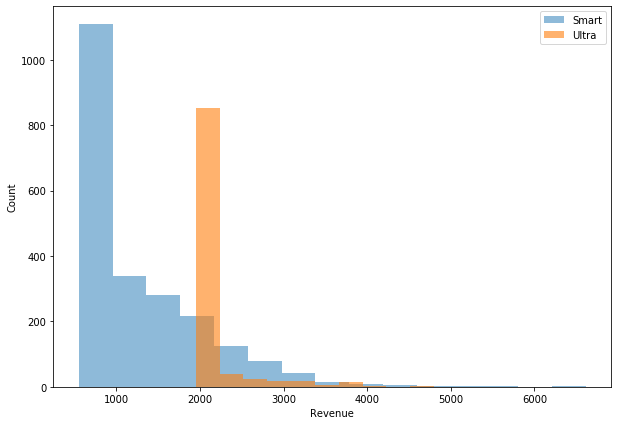

In [22]:
# гистограммы выручки по тарифам
# profit by tariff hist

# отобразим гистограммы на одном графике
plt.figure(figsize=(10,7))
plt.hist(smart['revenue'], bins=15, alpha=0.5, label='Smart')
plt.hist(ultra['revenue'], bins=10, alpha=0.6, label='Ultra')
plt.legend(loc='upper right')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

***1) Проверим гипотезу о различии средней выручки у двух тарифов.***

- **Сформулируем нулевую и альтернативную гипотезы: H<sub>0</sub> и H<sub>a</sub>.**
    
    H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> (средние выручки пользователей тарифов "Смарт" и "Ультра" равны)
    
    H<sub>a</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub> (средние выручки пользователей тарифов "Смарт" и "Ультра" НЕ равны) - двухсторонняя альтернативная гипотеза.
    
    $\mu$<sub>1</sub> и $\mu$<sub>2</sub> - средние выручек двух генеральных совокупностей пользователей тарифов **smart** и **ultra** соответственно
    

- **Зададим уровню значимости $\alpha$ значение 0.05.**


- **Выберем статистический критерий (случайную величину) для проверки гипотезы.**


Критерий Стьюдента (t-критерий). Наши выборки довольно большие, чтобы считать, что выборочное среднее распределно нормально и мы можем апроксимировать нормальное распределение t-распределением.

- **Проведем двухвыборочный t-тест.**

Используем функцию ttest_ind() из пакета scipy.stats потому, что сравниваем средние двух генеральных совокупностей.


- **Сделаем вывод о принятии или об отклонении H<sub>0</sub> в зависимости от значения p-value.**

Если p-value > $\alpha$, то у нас нет оснований отклонить H<sub>0</sub>. В противном случае, H<sub>0</sub> отклоняется и принимается H<sub>a</sub>.

-----

***1) Let's test the hypothesis about the difference in the average revenue of the two tariffs.***

- **Let's formulate the null and alternative hypotheses: H<sub>0</sub> and H<sub>a</sub>.**
    
     H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> (average revenues of "Smart" and "Ultra" tariff users are equal)
    
     H<sub>a</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub> (average revenues of Smart and Ultra users NOT equal) is a two-sided alternative hypothesis.
    
     $\mu$<sub>1</sub> and $\mu$<sub>2</sub> - average revenues of two general populations of users of **smart** and **ultra** tariffs, respectively
    

- **Set the $\alpha$ significance level to 0.05.**


- **Choose a statistical criterion (random value) to test the hypothesis.**


Student's test (t-test). Our samples are large enough to assume that the sample mean is distributionally normal and we can approximate the normal distribution with a t-distribution.

- **Perform a two-sample t-test.**

We use the ttest_ind() function from the scipy.stats package because we are comparing the averages of two populations.


- **Make a conclusion about accepting or rejecting H<sub>0</sub> depending on the p-value.**

If p-value > $\alpha$ then we have no reason to reject H<sub>0</sub>. Otherwise, H<sub>0</sub> is rejected and H<sub>a</sub> is accepted.

In [23]:
# выполним двухвыборочный двусторонний тест
alpha = .05
p_value = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var=False)

print(f"p-value: {p_value.pvalue}")
if p_value.pvalue < alpha:
    print('Отклоняем нулевую гипотезу и принимаем альтернативную. Выручки тарифов различаются.')
else:
    print('Отклоняем альтернативную гипотезу и принимаем нулевую. Выручки тарифов НЕ различаются.')

p-value: 4.19096840440574e-273
Отклоняем нулевую гипотезу и принимаем альтернативную. Выручки тарифов различаются.


In [24]:
smart_rev_mean = round(smart['revenue'].mean(), 2)
ultra_rev_mean = round(ultra['revenue'].mean(), 2)
print(f'Выборочное среднее выручки пользователей тарифа "Смарт": {smart_rev_mean}')
print(f'Выборочное среднее выручки пользователей тарифа "Ультра": {ultra_rev_mean}')

Выборочное среднее выручки пользователей тарифа "Смарт": 1257.28
Выборочное среднее выручки пользователей тарифа "Ультра": 2071.38


При проведении теста задали параметр **equal_var=False**, так как сравниваемые выборки отличаются размером, а также есть различия в поведении у пользователей тарифа **ultra**. Получили значение p-value намного меньше уровня значимости. Это означает, что вероятность получить такие или еще большие значения статистического критерия, при условии, что нулевая гипотеза верна, почти равна нулю.

----

During the test, the **equal_var=False** parameter was set, since the compared samples differ in size, and there are also differences in the behavior of users of the **ultra** tariff. We got a p-value much less than the significance level. This means that the probability of obtaining such or even greater values of the statistical criterion, provided that the null hypothesis is true, is almost zero.

***2) Проверим гипотезу о различии средней выручки у пользователей из Москвы и других регионов.***

- **Сформулируем нулевую и альтернативную гипотезы: H<sub>0</sub> и H<sub>a</sub>.**
    
    H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> (средняя выручка пользователей из Москвы равна выручке пользователей из других регионов)
    
    H<sub>a</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub> (средняя выручка пользователей из Москвы НЕ равна выручке пользователей из других регионов) - двухсторонняя альтернативная гипотеза.
    
    $\mu$<sub>1</sub> и $\mu$<sub>2</sub> - средние выручек двух генеральных совокупностей пользователей из Москвы и других регионов соответственно
    

- **Зададим уровню значимости $\alpha$ значение 0.05.**


- **Выберем статистический критерий (случайную величину) для проверки гипотезы.**


Критерий Стьюдента (t-критерий). Наши выборки довольно большие, чтобы считать, что выборочное среднее распределно нормально и мы можем апроксимировать нормальное распределение t-распределением.

- **Проведем двухвыборочный t-тест.**

Используем функцию ttest_ind() из пакета scipy.stats, потому, что сравниваем средние двух генеральных совокупностей.


- **Сделаем вывод о принятии или об отклонении H<sub>0</sub> в зависимости от значения p-value.**

Если p-value > $\alpha$, то у нас нет оснований отклонить H<sub>0</sub>. В противном случае, H<sub>0</sub> отклоняется и принимается H<sub>a</sub>.

----

***2) Let's test the hypothesis about the difference in average revenue between users from Moscow and other regions.***

- **Let's formulate the null and alternative hypotheses: H<sub>0</sub> and H<sub>a</sub>.**
    
     H<sub>0</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> (the average revenue of users from Moscow is equal to the revenue of users from other regions)
    
     H<sub>a</sub>: $\mu$<sub>1</sub> $\neq$ $\mu$<sub>2</sub> (the average revenue of users from Moscow is NOT equal to the revenue of users from other regions) is a two-sided alternative hypothesis.
    
     $\mu$<sub>1</sub> and $\mu$<sub>2</sub> - average revenues of two general populations of users from Moscow and other regions, respectively
    

- **Set the $\alpha$ significance level to 0.05.**


- **Choose a statistical criterion (random value) to test the hypothesis.**


Student's test (t-test). Our samples are large enough to assume that the sample mean is distributionally normal and we can approximate the normal distribution with a t-distribution.

- **Perform a two-sample t-test.**

We use the ttest_ind() function from the scipy.stats package because we are comparing the averages of two populations.


- **Make a conclusion about accepting or rejecting H<sub>0</sub> depending on the p-value.**

If p-value > $\alpha$ then we have no reason to reject H<sub>0</sub>. Otherwise, H<sub>0</sub> is rejected and H<sub>a</sub> is accepted.

In [25]:
# добавим к общей таблице города пользователей
users_activity_month = users_activity_month.join(users['city'], on='user_id')

# создадим колонку с категорией города (Москва, Другой)
def city_assigner(row):
    if row['city'] == 'Москва':
        return 'Москва'
    else:
        return 'Другой'
    
users_activity_month['city_cat'] = users_activity_month.apply(city_assigner, axis=1)
users_activity_month

,user_id,month,mb_used,n_calls,calls_duration,n_messages,tariff,revenue,city,city_cat
0,1000,5,2253.49,22.0,149.0,22.0,ultra,1950.0,Краснодар,Другой
1,1000,6,23233.77,43.0,159.0,60.0,ultra,1950.0,Краснодар,Другой
2,1000,7,14003.64,47.0,319.0,75.0,ultra,1950.0,Краснодар,Другой
3,1000,8,14055.93,52.0,391.0,81.0,ultra,1950.0,Краснодар,Другой
4,1000,9,14568.91,58.0,439.0,57.0,ultra,1950.0,Краснодар,Другой
...,...,...,...,...,...,...,...,...,...,...
3198,1498,10,20579.36,41.0,230.0,42.0,smart,1750.0,Владикавказ,Другой
3199,1499,9,1845.75,9.0,64.0,11.0,smart,550.0,Пермь,Другой
3200,1499,10,17788.51,68.0,429.0,48.0,smart,1150.0,Пермь,Другой
3201,1499,11,17963.31,74.0,574.0,59.0,smart,1399.0,Пермь,Другой


In [26]:
#сформируем выборки (Москва vs Другие)

from_moscow = users_activity_month.query('city_cat == "Москва"')
from_another = users_activity_month.query('city_cat == "Другой"')

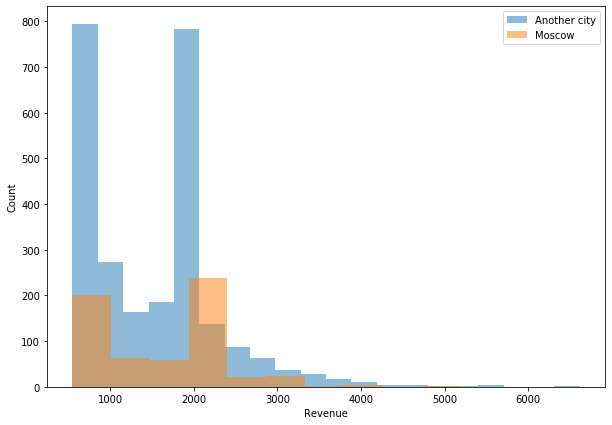

In [27]:
# гистограммы выручки по городам

# отобразим гистограммы на одном графике
plt.figure(figsize=(10,7))
plt.hist(from_another['revenue'], alpha=0.5, bins=20, label='Another city')
plt.hist(from_moscow['revenue'], bins=10, alpha=0.5, label='Moscow')
plt.legend(loc='upper right')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

In [28]:
# выполним двухвыборочный двусторонний тест
alpha = .05
p_value = st.ttest_ind(from_another['revenue'], from_moscow['revenue'], equal_var=False)

print(f"p-value: {p_value.pvalue}")
if p_value.pvalue < alpha:
    print('Отклоняем нулевую гипотезу и принимаем альтернативную. Выручки по городам различаются.')
else:
    print('Отклоняем альтернативную гипотезу и принимаем нулевую. Выручки по городам НЕ различаются.')

p-value: 0.44160456365323286
Отклоняем альтернативную гипотезу и принимаем нулевую. Выручки по городам НЕ различаются.


## Общий вывод / Conclusion

В данном проекте мы работали с данными 500 пользователей телеком-оператора "Мегалайн". Целью проекта было установить лучший из двух тарифов.

Сначала изучили данные из разный файлов, привели переменные к нужным типам. Ошибок и аномалий в данных обнаружено не было. Далее, пересчитали средние показатели продолжительности звонков, количества смс, интрнет-траффика на пользователя в конкретный месяц. Пересчитанные данные объединили в общую таблицу методом merge(). После этого, расчитали помесячную выручку на клиента, исходя из правил оператора: секунды округляются до минут, а мегабайты до гигабайт. Проверили распределения основных величин и описали их.

В ходе проекта было проверено две гипотезы:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются. 

**Вывод:** между выручками тарифов есть статистически значимые различия. Тариф "Ультра" приносит в среднем больше денег. Это можно описать тем фактом, что пользователи обоих тарифов в среднем недоиспользуют их лимиты (звонки, смс, иногда интернет). Они платят только абонентскую плату, а она больше в тарифе "Ультра".

- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Вывод:** между выручкой пользователей из Москвы и других городов **НЕТ** статистически значимых различий.

Исходя из результатов исследования, можно сделать вывод, что тариф "Ультра" лучше по выручке и большую долю рекламного бюджет лучше пустить на него. При этом, рекламный бюджет не должен зависеть от города: нет смысла пускать больший рекламный бюджет на Москву, так как выручка там не отличается от выручки в других регионах.

----

In this project, we worked with the data of 500 users of the Megaline telecom operator. The aim of the project was to establish the best of the two tariffs.

First, we studied the data from different files, brought the variables to the required types. No errors or anomalies were found in the data. Further, we recalculated the average indicators of the duration of calls, the number of SMS, Internet traffic per user in a particular month. The recalculated data was merged into a common table using the merge() method. After that, we calculated the monthly revenue per client, based on the rules of the operator: seconds are rounded to minutes, and megabytes to gigabytes. We checked the distributions of the main quantities and described them.

The project tested two hypotheses:
- the average revenue of users of the "Ultra" and "Smart" tariffs differ.

**Conclusion:** there are statistically significant differences between tariff revenues. The "Ultra" tariff brings more money on average. This can be described by the fact that users of both tariffs on average underuse their limits (calls, sms, sometimes internet). They pay only a monthly fee, and it is more in the "Ultra" tariff.

- the average revenue of users from Moscow differs from the revenue of users from other regions.

**Conclusion:** between the revenue of users from Moscow and other cities **NO** statistically significant differences.

Based on the results of the study, we can conclude that the "Ultra" tariff is better in terms of revenue and it is better to spend a large share of the advertising budget on it. At the same time, the advertising budget should not depend on the city: there is no point in spending a larger advertising budget on Moscow, since the revenue there does not differ from the revenue in other regions.